# Importing the necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading the "Sainsbury" supermarket data

In [4]:
sains_data = pd.read_csv('datasets/All_Data_Sains.csv')
sains_data.head()

,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Sains,1.50,3.00,kg,Alpro Plain Unsweetened No Sugars Plant-Based ...,20240228,fresh_food,False
1,Sains,1.65,0.82,l,Cravendale Filtered Fresh Skimmed Milk Fresher...,20240228,fresh_food,False
2,Sains,1.65,0.82,l,Cravendale Filtered Fresh Whole Milk 2L Freshe...,20240228,fresh_food,False
3,Sains,0.90,0.90,kg,Sainsbury's Fairtrade Bananas Loose,20240228,fresh_food,True
4,Sains,1.45,0.64,l,Sainsbury's British Semi Skimmed Milk 2.27L (4...,20240228,fresh_food,True


# Modifying the column names and changing the format of the date column

In [5]:
sains_data.rename(columns={'prices_(£)': 'prices_pounds', 'prices_unit_(£)': 'per_unit_price'}, inplace=True)
sains_data.head()

,supermarket,prices_pounds,per_unit_price,unit,names,date,category,own_brand
0,Sains,1.50,3.00,kg,Alpro Plain Unsweetened No Sugars Plant-Based ...,20240228,fresh_food,False
1,Sains,1.65,0.82,l,Cravendale Filtered Fresh Skimmed Milk Fresher...,20240228,fresh_food,False
2,Sains,1.65,0.82,l,Cravendale Filtered Fresh Whole Milk 2L Freshe...,20240228,fresh_food,False
3,Sains,0.90,0.90,kg,Sainsbury's Fairtrade Bananas Loose,20240228,fresh_food,True
4,Sains,1.45,0.64,l,Sainsbury's British Semi Skimmed Milk 2.27L (4...,20240228,fresh_food,True


In [6]:
sains_data['date'] = pd.to_datetime(sains_data['date'], format='%Y%m%d')

In [7]:
print("The shape of the Sainsbury dataset is {}".format(sains_data.shape))

The shape of the Sainsbury dataset is (1387644, 8)


In [8]:
print("The column names in Sainsbury dataset - {}".format(sains_data.columns))

The column names in Sainsbury dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [9]:
sains_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387644 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   supermarket     1387644 non-null  object        
 1   prices_pounds   1387644 non-null  float64       
 2   per_unit_price  1387515 non-null  float64       
 3   unit            1387515 non-null  object        
 4   names           1387644 non-null  object        
 5   date            1387644 non-null  datetime64[ns]
 6   category        1387644 non-null  object        
 7   own_brand       1387644 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 75.4+ MB


# Statistical Overview of the numerical columns

In [10]:
sains_data.describe()

,prices_pounds,per_unit_price,date
count,1.387644e+06,1.387515e+06,1387644
mean,5.427956e+00,4.875425e+01,2024-02-03 01:39:05.882373632
min,1.000000e-02,0.000000e+00,2024-01-09 00:00:00
25%,1.900000e+00,3.900000e+00,2024-01-21 00:00:00
50%,3.000000e+00,8.000000e+00,2024-02-04 00:00:00
75%,6.250000e+00,1.540000e+01,2024-02-16 00:00:00
max,1.900000e+02,4.000000e+04,2024-02-28 00:00:00
std,7.156165e+00,6.166903e+02,NaN


## Checking the rows with null values

In [11]:
sains_data.isnull().sum()

supermarket         0
prices_pounds       0
per_unit_price    129
unit              129
names               0
date                0
category            0
own_brand           0
dtype: int64

In [12]:
sains_null = sains_data[sains_data.isnull().any(axis=1)]
print(sains_null)

        supermarket  prices_pounds  per_unit_price unit  \
3634          Sains            4.5             NaN  NaN   
16620         Sains            1.2             NaN  NaN   
32921         Sains            1.2             NaN  NaN   
35972         Sains            4.5             NaN  NaN   
82926         Sains            1.2             NaN  NaN   
...             ...            ...             ...  ...   
1344568       Sains            4.5             NaN  NaN   
1352612       Sains            4.5             NaN  NaN   
1368920       Sains            1.2             NaN  NaN   
1371724       Sains            4.5             NaN  NaN   
1379057       Sains            4.5             NaN  NaN   

                                                     names       date  \
3634     Sainsbury's Hot Smoked Salmon & Baby Potato Sa... 2024-02-28   
16620                  Sainsbury's Hot Cross Bun Loaf 400g 2024-02-28   
32921                  Sainsbury's Hot Cross Bun Loaf 400g 2024-02-27   

In [13]:
rows_starting_with_sainsbury = sains_data[sains_data['names'].str.startswith('Sainsbury\'s Hot Cross Bun Loaf 400g')]
#print(rows_starting_with_sainsbury)

## Imputing null values

In [14]:
product_1_name = "Sainsbury's Hot Cross Bun Loaf 400g"
per_unit_price = 1.2
unit = "kg"

# Imputing null values for the specific product
sains_data.loc[sains_data['names'] == product_1_name, 'unit'] = sains_data.loc[sains_data['names'] == product_1_name, 'unit'].fillna(unit)
sains_data.loc[sains_data['names'] == product_1_name, 'per_unit_price'] = sains_data.loc[sains_data['names'] == product_1_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(sains_data[sains_data['names'] == product_1_name])

In [15]:
rows_starting_with_pasta = sains_data[sains_data['names'].str.startswith('Sainsbury\'s Spicy Chicken & Puttanesca Pasta')]
#print(rows_starting_with_pasta)

product_2_name = "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference"
per_unit_price = 14.2
unit = "kg"

# Imputing null values for the specific product
sains_data.loc[sains_data['names'] == product_2_name, 'unit'] = sains_data.loc[sains_data['names'] == product_2_name, 'unit'].fillna(unit)
sains_data.loc[sains_data['names'] == product_2_name, 'per_unit_price'] = sains_data.loc[sains_data['names'] == product_2_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(sains_data[sains_data['names'] == product_2_name])

## Cross checking if any null values are present after imputing

In [16]:
# Dropping the remaining null values
sains_data.dropna(inplace = True)
print("\nChecking for null values:\n{}".format(sains_data.isnull().sum()))


Checking for null values:
supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64


# Visualizations

## Line graph for price trends over time

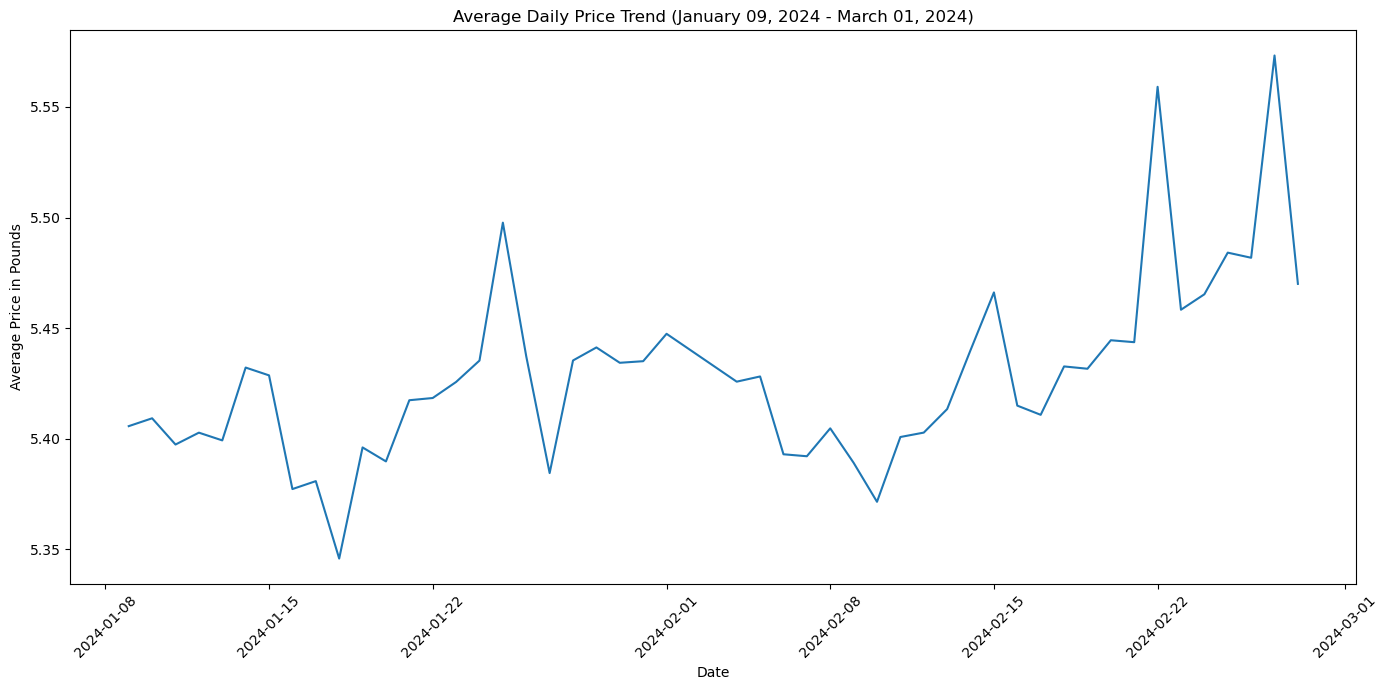

In [17]:
daily_price_trends = sains_data.groupby(sains_data['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_price_trends, 
             x='date', 
             y='prices_pounds')

plt.title('Average Daily Price Trend (January 09, 2024 - March 01, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

## Overall price distribution using a Histogram

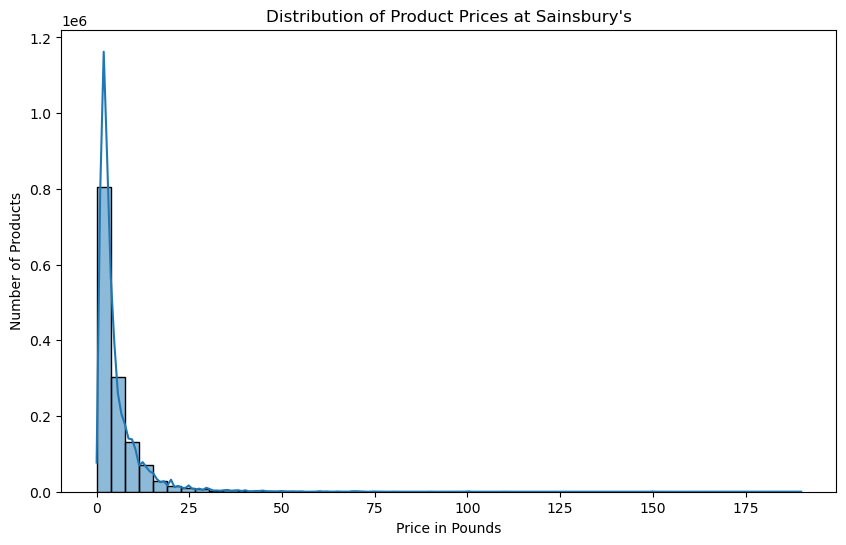

In [18]:
# Analyze the price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(sains_data['prices_pounds'], 
             bins=50, 
             kde=True)
plt.title('Distribution of Product Prices at Sainsbury\'s')
plt.xlabel('Price in Pounds')
plt.ylabel('Number of Products')
plt.show()

## Bar chart showing the number of products per category

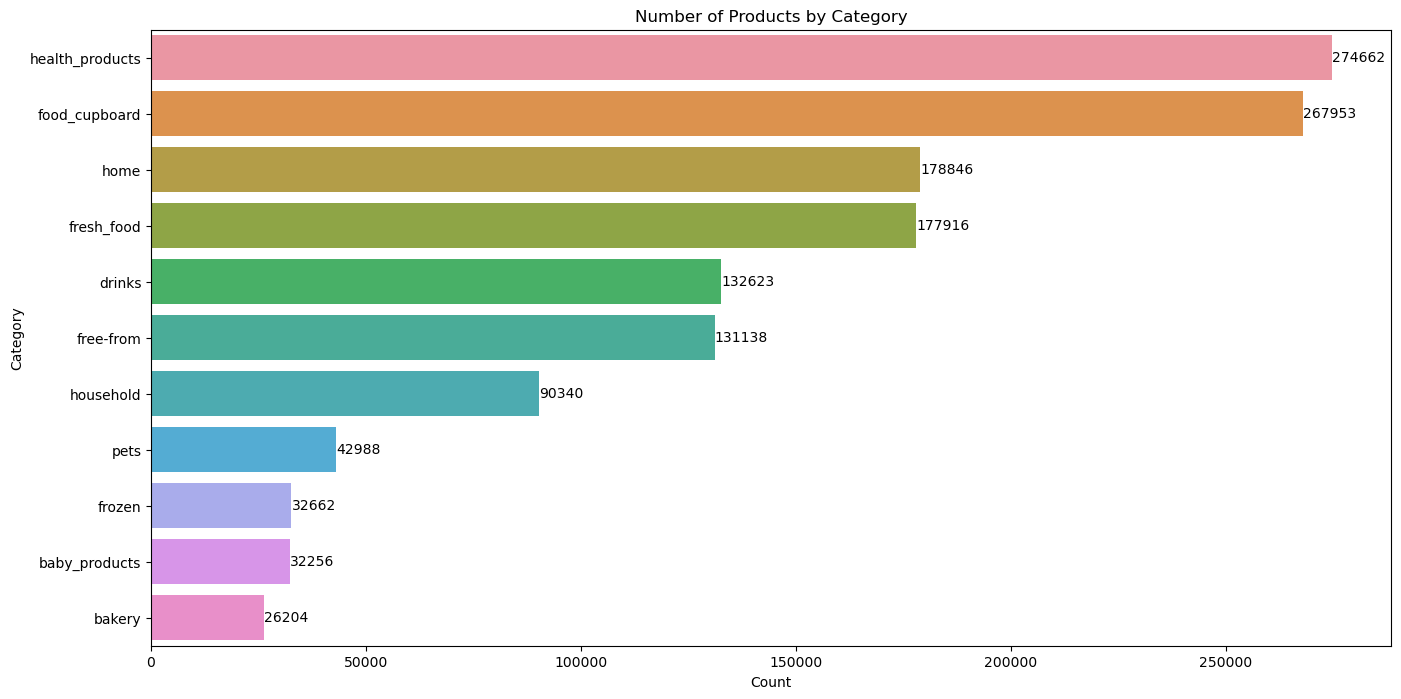

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart showing the number of products per category
plt.figure(figsize=(16, 8))
sns.countplot(y='category', 
              data=sains_data, 
              order=sains_data['category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')

# Adding annotations
for i, count in enumerate(sains_data['category'].value_counts()):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Calculating the average price per category

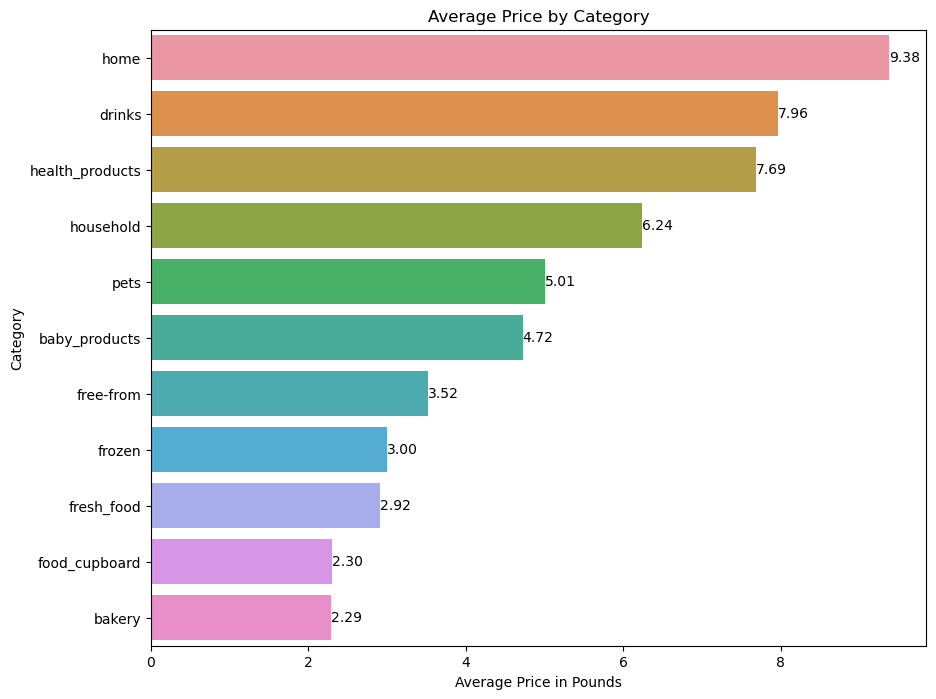

In [20]:
# Calculate the average price per category
average_price_per_category_sains = sains_data.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(10, 8))
sns.barplot(x='prices_pounds', y='category', data=average_price_per_category_sains)
plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')

# Adding annotations
for i, price in enumerate(average_price_per_category_sains['prices_pounds']):
    plt.text(price, i, '{:.2f}'.format(price), ha='left', va='center')

plt.show()

## Box plot for distribution of prices for each product category

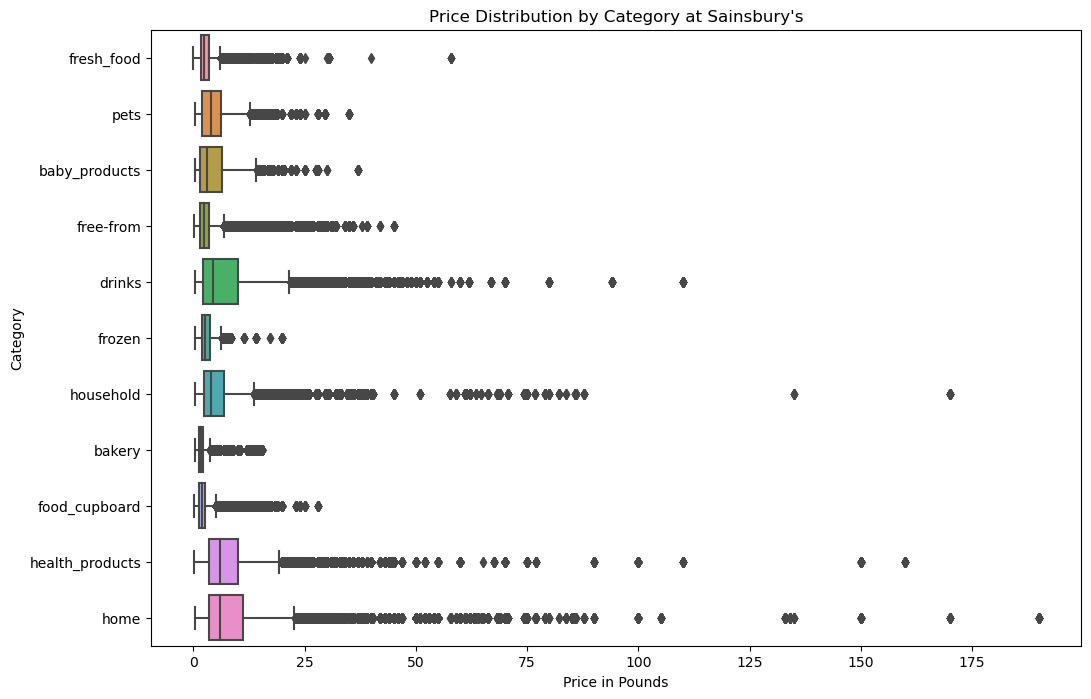

In [21]:
# Analyze the price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='prices_pounds',
            y='category', 
            data=sains_data)
plt.title('Price Distribution by Category at Sainsbury\'s')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
#plt.xticks(rotation=45)
plt.show()

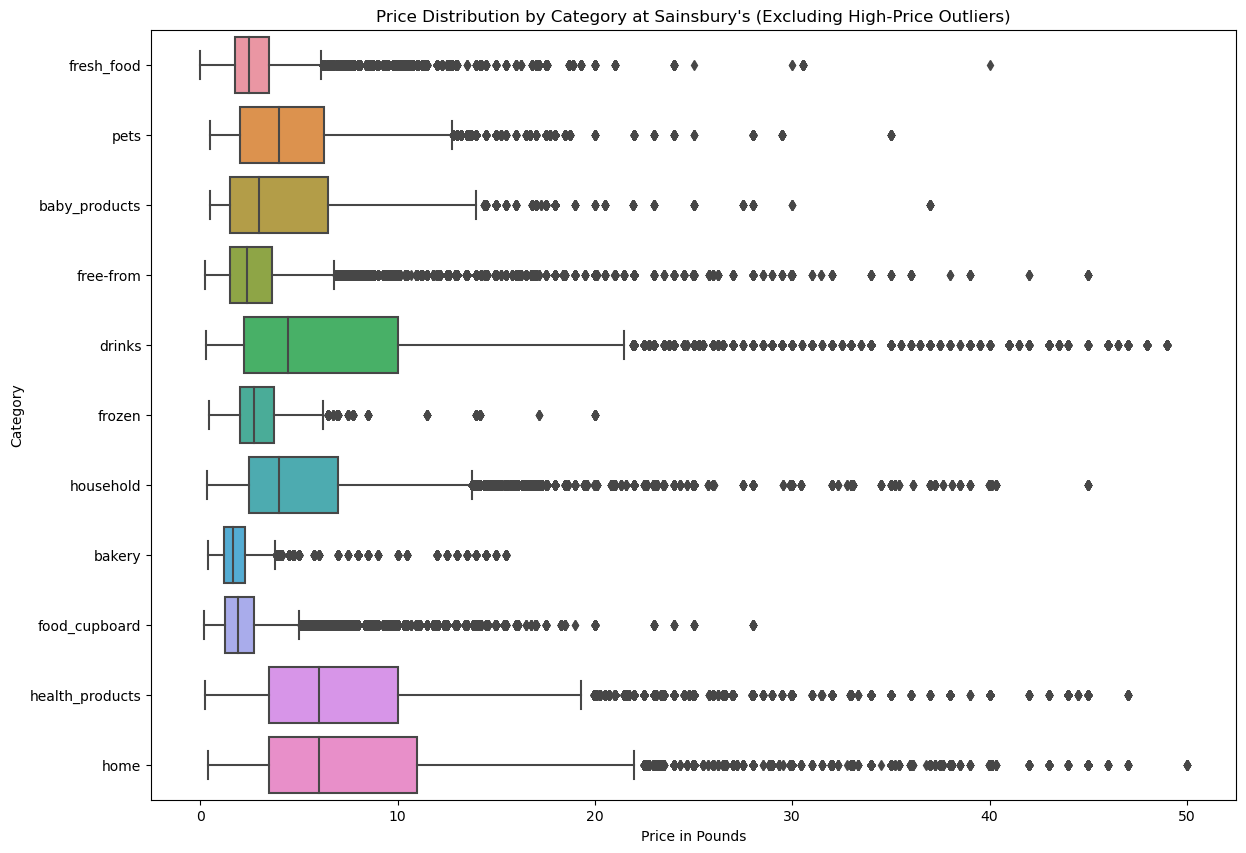

In [22]:
# Category-specific price distribution
plt.figure(figsize=(14, 10))
sns.boxplot(x='prices_pounds', y='category', data=sains_data[sains_data['prices_pounds'] < 50])  # Limiting to remove outliers for visualization clarity
plt.title('Price Distribution by Category at Sainsbury\'s (Excluding High-Price Outliers)')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
#plt.xticks(rotation=45)
plt.show()


## Pie chart for proportion of prices contributed by each product category

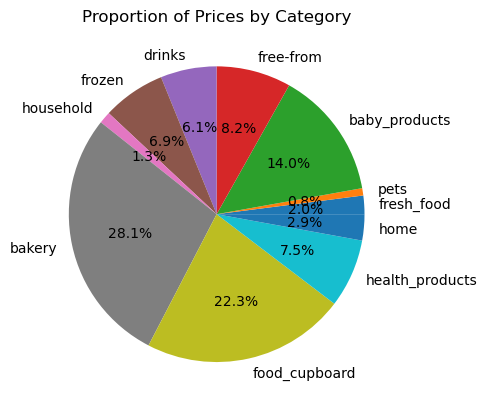

In [23]:
# Pie chart
plt.pie(sains_data.groupby("category")["prices_pounds"].sum(), 
        labels = sains_data["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

## Sainsbury Own Brand items count

In [24]:
sains_ownBrand_value = sains_data['own_brand'].value_counts()
print("\nNumber of items owned by ASDA and not owned by ASDA:\n{}".format(sains_ownBrand_value))


Number of items owned by ASDA and not owned by ASDA:
own_brand
False    1069390
True      318198
Name: count, dtype: int64


## Average Price Comparison: Own Brand vs. Non-Own Brand

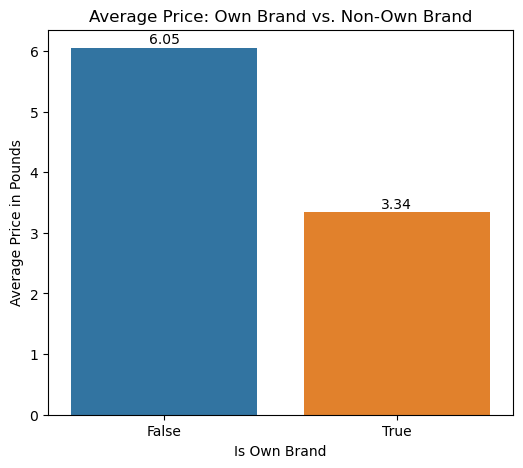

In [25]:
own_brand_prices_sains = sains_data.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='own_brand', 
            y='prices_pounds', 
            data=own_brand_prices_sains)
plt.title('Average Price: Own Brand vs. Non-Own Brand')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_sains.iterrows():
    plt.text(index, row['prices_pounds'] + 0.07, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")
    
plt.show()

## Correlation Matrix

In [26]:
# Extract only the 'date' column and 'prices_pounds' column
sains_data_corr = sains_data[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_sains = sains_data_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_sains)

Correlation Matrix:
                   date  prices_pounds
date           1.000000       0.003123
prices_pounds  0.003123       1.000000


## Different values present within `category`

In [27]:
sains_category_value = sains_data['category'].value_counts()
print("\nThe different values in category:\n{}".format(sains_category_value))


The different values in category:
category
health_products    274662
food_cupboard      267953
home               178846
fresh_food         177916
drinks             132623
free-from          131138
household           90340
pets                42988
frozen              32662
baby_products       32256
bakery              26204
Name: count, dtype: int64


# Re-categorizing

## For `drinks`

In [28]:
keywords_drinks = {
    'hot_beverages': ['hot', 'chocolate', 'coffee', 'cappuccino', 'espresso', 'tea', 'chai', 'cocoa'],
    
    'cold_beverages': ['water', 'soda', 'juice', 'iced', 'drink', 'cordial', 'smoothie', 'energy drink', 
                       'sugar', 'Coca-Cola', 'Diet Coke'],
    
    'alcoholic_beverages': ['wine', 'prosecco', 'sauvignon', 'malbec', 'cava', 'beer', 'cider', 
                            'stout', 'ale', 'lager'],
    
    'non_alcoholic_beverages': ['soft', 'non', 'alcoholic', 'kombucha', 'health'],
    
    'coffee_and_tea_related': ['coffee', 'beans', 'pods', 'ground', 'tea', 'bags', 'herbal']
}

# Ensure 'names' column is always treated as string
sains_data['names'] = sains_data['names'].astype(str)

# Function to assign drinks subcategory based on keywords using NLTK
def assign_drinks_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_drinks.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_drinks'

# Apply the function to rows in the 'drinks' category
sains_data.loc[sains_data['category'] == 'drinks', 'category'] = sains_data[sains_data['category'] == 'drinks']['names'].apply(assign_drinks_subcategory_nltk)

# Save the updated DataFrame
sains_data.to_csv('datasets/updated_data/updated_All_Data_Sains.csv', index=False)

In [29]:
keywords_food_cupboard = {
    'breakfast_items': [
        'easter eggs', 'cereals', 'cereal bars', 'biscuits', 'crackers', 
        'coffee', 'tea', 'hot chocolate', 'jams', 'spreads', 'desserts', 
        'marmalade', 'honey', 'nutella', 'porridge', 'granola', 'oats',
        'peanut butter', 'chocolate spread', 'fruit preserves', 'scone', 'pancake', 
        'waffle mix', 'maple syrup', 'breakfast biscuits', 'toaster pastries'
    ],
    'cooking_essentials': [
        'rice', 'pasta', 'noodles', 'noodle pots', 'instant snacks', 
        'cooking sauces', 'meal kits', 'sides', 'lasagne', 'spaghetti', 
        'macaroni', 'risotto', 'curry', 'stir fry', 'soup', 'broth',
        'gnocchi', 'couscous', 'quinoa', 'bulgur', 'teriyaki sauce', 'salsa',
        'pesto', 'alfredo sauce', 'bolognese sauce', 'chili sauce', 'taco seasoning', 
        'fajita seasoning', 'pad thai', 'ramen', 'udon', 'soba', 'savoury rice', 
        'cous cous', 'packet soup', 'packet noodles'
    ],
    'pantry_staples': [
        'tinned food', 'condiments', 'cooking ingredients', 'home baking', 
        'under 100 calories food cupboard', 'flour', 'sugar', 'yeast', 
        'baking powder', 'vanilla extract', 'cocoa powder', 'vinegar', 
        'oil', 'seasonings', 'spices', 'herbs', 'beans', 'lentils',
        'mustard', 'ketchup', 'mayonnaise', 'relish', 'pickles', 'olives', 
        'capers', 'artichoke hearts', 'sun-dried tomatoes', 'chickpeas', 
        'split peas', 'almond flour', 'coconut flour', 'cake mix', 
        'icing sugar', 'chocolate chips', 'marzipan', 'fondant', 'nut butters', 
        'curds', 'extra special jams', 'custard', 'meringues', 'pudding pots', 
        'tinned fruit', 'dessert mixes', 'sponge pudding', 'ice cream cones', 
        'ice pops','baking nuts', 'seeds', 'baking fruit', 'syrup', 'treacle', 
        'chocolate chips', 'inclusions', 'cake decorations', 'baking kits', 
        'dairy free baking ingredients','extra special baking ingredients'
    ]
}

sains_data['names'] = sains_data['names'].astype(str)

# Function to assign food cupboard subcategory based on keywords using NLTK
def assign_food_cupboard_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_food_cupboard.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_food_cupboard'

# Apply the function to rows in the 'food_cupboard' category
sains_data.loc[sains_data['category'] == 'food_cupboard', 'category'] = sains_data[sains_data['category'] == 'food_cupboard']['names'].apply(assign_food_cupboard_subcategory_nltk)

# Save the updated DataFrame
sains_data.to_csv('datasets/updated_data/updated_All_Data_Sains.csv', index=False)

In [31]:
fresh_food_keywords = {
    'fruits': [
    'apple', 'pear', 'banana', 'grape', 'berry', 'cherry', 'orange', 'lemon', 'lime',
    'grapefruit', 'melon', 'pineapple', 'mango', 'kiwi', 'peach', 'plum', 'nectarine',
    'fruit pot', 'snack pack', 'organic', 'sweetclems', 'papaya', 'pomegranate',
    'physalis', 'cherry', 'raspberry', 'strawberry', 'blueberry', 'avocado', 
    'pomegranate', 'watermelon', 'honeydew', 'galia', 'coconut', 'dragon fruit', 
    'kiwis', 'seedless grapes', 'sweetclems', 'conference pears', 'banana chips',
    'dried mango', 'blackberries', 'pineapple lolly', 'mango chunks', 'tart plums',
    'red grapefruit', 'sweet plums', 'loose lime', 'crisp apple slices', 'juniper berries'
    ],
    'vegetables': [
    'potato', 'carrot', 'broccoli', 'brussels sprout', 'plantain', 'sweetcorn', 'courgette',
    'aubergine', 'leek', 'mushroom', 'cabbage', 'kale', 'beetroot', 'parsnip', 'garlic',
    'onion', 'spinach', 'tomato', 'pepper', 'asparagus', 'chilli', 'ginger', 'butternut squash',
    'pak choi', 'swede', 'celeriac', 'turnip', 'sweet potato', 'cherry tomato', 'fine bean',
    'baby corn', 'maris piper', 'red onion', 'cauliflower', 'chestnut mushroom', 'curly kale', 
    'cavolo nero', 'tenderstem broccoli', 'mangetout', 'savoy', 'spring green', 'red cabbage',
    'white cabbage', 'white potato', 'baking potato', 'trimmed leek', 'baby potato','roast potatoes', 
    'mash', 'peeled potatoes', 'rosti', 'cheesy mash', 'root veg mash','king edward', 'bunched beetroot', 
    'fluffy', 'creamy', 'smooth', 'crisp', 'golden', 'versatile','flavoursome', 'savoury'
    ],
    'meat_poultry_fish': [
    'pork', 'lamb', 'beef', 'chicken', 'gammon', 'fillets', 'breast', 'leg', 'roasting', 
    'joint', 'tender', 'succulent', 'unsmoked', 'smoked', 'breaded', 'mini', 'salami',
    'cheese', 'cooked', 'goujons', 'sausages', 'chipolatas', 'wiltshire', 'hand', 
    'bavarian', 'style', 'corned', 'honey', 'roast', 'turkey', 'cured', 'loin', 'stir-fry', 
    'stuffed', 'thigh', 'back', 'bacon', 'rashers', 'steak', 'mince', 'lean', 'less', 'fat',
    'seafood', 'fish', 'basa', 'sharing', 'selection', 'continental', 'german', 
    'herby', 'stuffing', 'chargrill', 'extra', 'tasty', 'sliced', 'lunch', 'tongue', 
    'oven', 'baked', 'dry', 'stir-fry', 'classic', 'sage', 'onion', 
    'cold', 'water', 'prawns', 'haddock', 'fishcakes', 'melting', 'cheddar', 'hollandaise', 
    'king', 'prawn', 'masala', 'beer', 'battered', 'sea', 'bass', 'seafood', 'sticks', 
    'mussels', 'honey', 'roasted', 'mackerel', 'whole', 'basa', 'kipper', 'garlic', 'butter', 
    'surimi', 'royale', 'chunks', 'hot', 'spicy', 'sweetcure', 'kiln', 'boneless', 'lemon', 
    'parsley', 'herrings', 'onions', 'salmon', 'side', 'sea', 'smoked', 'salted', 'saltfish', 
    'thai', 'infused', 'vintage', 'leek', 'zesty', 'hake', 'chilli', 'lime', 'lightly', 
    'coated', 'cod', 'loin', 'flaky', 'terrine', 'reduced', 'fat', 'cocktail', 'sweet', 
    'chilli', 'peeled', 'breadcrumb', 'oak', 'pepper', 'superior', 'wafer', 'thin', 'approx', 
    'slices', 'snack', 'bites', 'german', 'pepperoni', 'peperami', 'original', 'minis', 
    'chorizo', 'casero', 'pate', 'snacking', 'hot', 'dogs', 'vegan', 'alternatives', 'Yogurt'
    ],

}
sains_data['names'] = sains_data['names'].astype(str)

# Function to assign fresh food subcategory based on keywords using NLTK
def assign_fresh_food_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in fresh_food_keywords.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_fresh_food'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'fresh_food' category
sains_data.loc[sains_data['category'] == 'fresh_food', 'category'] = sains_data[sains_data['category'] == 'fresh_food']['names'].apply(lambda x: assign_fresh_food_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
sains_data.to_csv('datasets/updated_data/updated_All_Data_Sains.csv', index=False)

In [32]:
# Define keywords for the household subcategories
keywords_household = {
    'cleaning_supplies': [
        'cleaner', 'detergent', 'disinfectant', 'bleach', 'wipes', 'wash', 'soap dish', 
        'laundry', 'dispenser', 'fabric', 'tissues', 'cloth', 'softener', 'tissue', 'mat', 
        'freshener', 'cleaning', 'toilet', 'bin', 'air fresheners', 'home fragrance', 
        'eco-friendly', 'refills', 'batteries', 'light bulbs', 'DIY', 'car care', 
        'laundry detergent', 'fabric softener', 'toilet roll', 'tissues'
    ],
    'personal_care': [
        'shampoo', 'soap', 'toothpaste', 'conditioner', 'deodorant', 'comb', 'hairbrush', 
        'beauty', 'hair', 'intimate', 'bath', 'towel', 'hair dye', 'styling', 'bath', 'shower', 
        'soap', 'dental care', 'skin care', 'women’s toiletries', 'men’s toiletries', 
        'deodorants', 'body sprays', 'bladder weakness', 'period products', 'make up', 'nails', 
        'vegan beauty', 'sun care', 'travel', 'toiletries deals', 'gifting', 'pamper night', 
        'beauty electricals'
    ],
    'kitchen_essentials': [
        'bowls', 'plates', 'spoons', 'utensils', 'pan', 'dinner', 'bowl', 'spoon', 'plate', 
        'blender', 'toaster', 'straws', 'kitchen', 'stainless', 'tray', 'kettle', 'jug', 'dish', 
        'serving', 'chopping', 'bottle', 'water', 'storage', 'casserole', 'kitchen roll'
    ]
}

sains_data['names'] = sains_data['names'].astype(str)

# Function to assign household subcategory based on keywords using NLTK
def assign_household_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in keywords_household.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_household'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'household' category
sains_data.loc[sains_data['category'] == 'household', 'category'] = sains_data[sains_data['category'] == 'household']['names'].apply(lambda x: assign_household_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
sains_data.to_csv('datasets/updated_data/updated_All_Data_Sains.csv', index=False)

In [33]:
keywords_home_entertainment = {
    'garden_outdoor': [
        'garden furniture', 'BBQ', 'plant', 'flower', 'outdoor lighting', 
        'garden tools', 'lawn care', 'pest control', 'seeds', 'fertilizer'
    ],
    'bed_bath_home': [
        'bedding', 'towels', 'bath mat', 'shower curtain', 'pillow', 
        'duvet', 'bedspread', 'bathroom accessories', 'storage solutions'
    ],
    'music_film_games_books': [
        'DVD', 'Blu-ray', 'CD', 'vinyl records', 'video games', 
        'book', 'magazine', 'e-book reader', 'audio book','action figures', 'dolls', 
        'lego', 'board games', 'puzzle', 'outdoor toys', 'educational toys', 
        'video game console', 'remote control cars', 'notebook', 'pen', 
        'pencil', 'marker', 'stamps','envelopes', 'magazines', 'planner', 'calendar'
    ],
    'technology_electricals': [
        'laptop', 'tablet', 'smartphone', 'camera', 'headphones', 
        'speaker', 'TV', 'printer', 'smart home devices','AA batteries', 
        'AAA batteries', 'rechargeable batteries', 
        'LED bulbs', 'halogen bulbs', 'smart bulbs','batteries_light_bulbs'
    ],
    'partyware_gifting': [
        'party decorations', 'gift wrap', 'birthday cards', 'party favors', 
        'balloons', 'candles', 'gift bags', 'greeting cards'
    ],

    'travel_leisure': [
        'suitcase', 'backpack', 'travel accessories', 'camping gear', 
        'sports equipment', 'gym accessories', 'books for travel','tool kit', 'paint', 
        'brushes', 'car shampoo', 'car wax', 'air freshener', 'oil', 'antifreeze', 'screenwash'
    ]
}

sains_data['names'] = sains_data['names'].astype(str)

# Function to assign household subcategory based on keywords using NLTK
def assign_home_entertainment_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in keywords_home_entertainment.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_home_entertainment'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'household' category
sains_data.loc[sains_data['category'] == 'home', 'category'] = sains_data[sains_data['category'] == 'home']['names'].apply(lambda x: assign_home_entertainment_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
sains_data.to_csv('datasets/updated_data/updated_All_Data_Sains.csv', index=False)